# Titanic  - Zainab Malik

In [1]:
#https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial#3.-Model

# Libraries + data uploading 

In [2]:
# import needed libraries
import numpy as np
import pandas as pd 
import math
from IPython.display import HTML
import matplotlib.pyplot as plt  
from IPython.display import Image, display
from IPython.display import Image, display
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

# import the dataset .CSV file 
dataset = pd.read_csv("D:\\ZAINAB\\Work\\UNDP program\\tit\\train.csv")
test = pd.read_csv("D:\\ZAINAB\\Work\\UNDP program\\tit\\test.csv")

C:\Users\zaina\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zaina\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\zaina\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# dataset information

- dataset shape and datatype
- dataset describe for each column
- mising data
- 0 and 1 counting 
- survived women and men percentages 

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
print(dataset.isnull().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print('The number of samples for each class\n', dataset['Survived'].value_counts()) 

The number of samples for each class
 Survived
0    549
1    342
Name: count, dtype: int64


In [8]:
women = dataset.loc[dataset.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [9]:
men = dataset.loc[dataset.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_men)

% of women who survived: 0.18890814558058924


# Working with missing data in train data

# 1. Age

In [10]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
dataset['Age'].fillna(dataset.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace=True)

In [11]:
print(dataset.isnull().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 2. Embarked

In [12]:
# Filter and display rows with missing values in the specified column
missing_data = dataset[dataset['Embarked'].isnull()]
missing_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


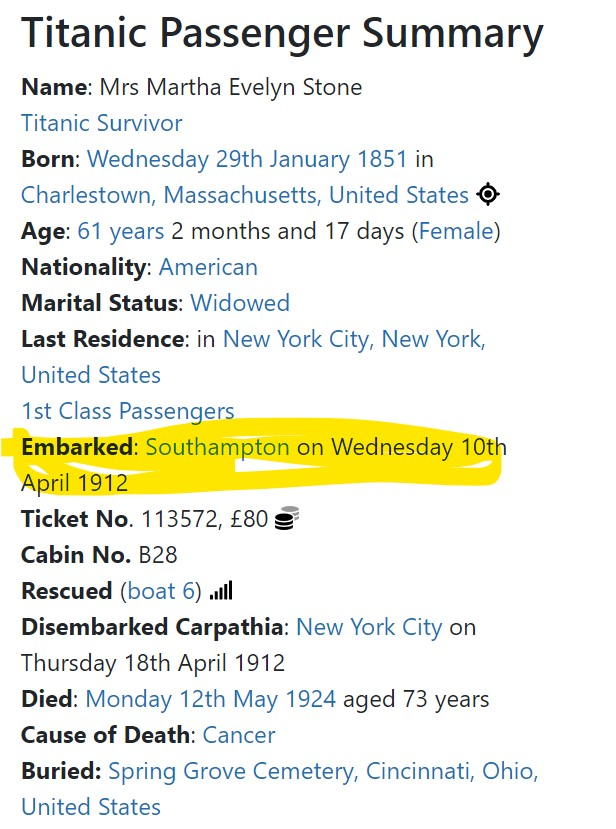

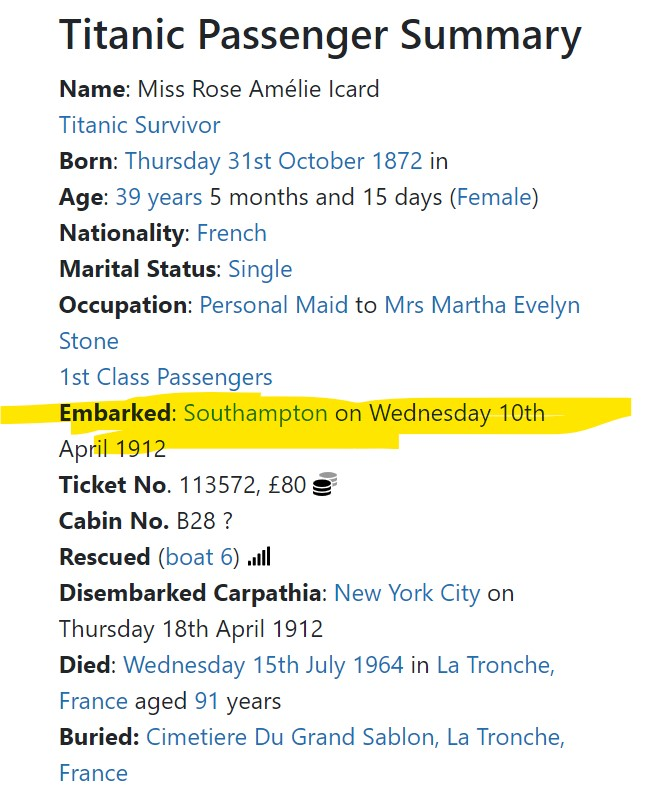

In [13]:
# by searching on internet both of them are S
image1 = Image(filename='1.jpg', width=150, height=50)
image2 = Image(filename='2.jpg', width=150, height=50)

# Create a horizontal layout by displaying the images in the same row
display(image1, image2) 

In [14]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [15]:
### Cabin sikipped

# working with mising data in test datset

In [16]:
print(test.isnull().sum()) 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
test['Age'].fillna(test.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].transform('median'), inplace=True)

In [18]:
print(test.isnull().sum()) 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [19]:
# embarked skipped

# Categorical to numerical 

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(dataset['Sex'])
dataset["Sex"] = label

label2 = le.fit_transform(dataset['Embarked'])
dataset["Embarked"] = label2

labelt = le.fit_transform(test['Sex'])
test["Sex"] = labelt

labelt2 = le.fit_transform(test['Embarked'])
test["Embarked"] = labelt2

dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


# Add features

# 1. age group

In [21]:
age_bins = [0, 18, 30, 50, float('inf')]  # Age group boundaries
age_labels = ['1', '2', '3', '4']  # Age group labels 0-18 '1', 19-30 '2', 31-50 '3',51+ '4'

dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, right=False) 

dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,NaN,2,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,2


# 2. family size

In [22]:
total = dataset['SibSp'] + dataset['Parch']
dataset['Total'] = total
totalt = test['SibSp'] + test['Parch']
test['Total'] = totalt

# 3. fare group regarding to embarked

In [23]:
test['FareGroup'] = test.groupby('Embarked')['Fare'].transform('median')
dataset['FareGroup'] = dataset.groupby('Embarked')['Fare'].transform('median')

# Normalization

In [24]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Total,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,13.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,1,29.70
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,0,13.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,1,13.00
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,3,0,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,2,0,13.00
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,2,0,13.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,NaN,2,2,3,13.00
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,2,0,29.70


In [25]:
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column
columns = ['Age','Fare','FareGroup']
for column in columns:
    dataset[column] = min_max_normalization(dataset[column])
    test[column] = min_max_normalization(test[column])

In [26]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Total,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,NaN,2,2,1,0.23918
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,0,3,1,1.00000
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,2,2,0,0.23918
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,2,3,1,0.23918
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,NaN,2,3,0,0.23918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0,0,211536,0.025374,NaN,2,2,0,0.23918
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.233476,0,0,112053,0.058556,B42,2,2,0,0.23918
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.264891,1,2,W./C. 6607,0.045771,NaN,2,2,3,0.23918
889,890,1,1,"Behr, Mr. Karl Howell",1,0.321438,0,0,111369,0.058556,C148,0,2,0,1.00000


# feature selection

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from matplotlib import pyplot
import matplotlib.pyplot as plt

#skip cabin name ticket passengerid
X= dataset[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare',
            'Embarked','AgeGroup','Total','FareGroup']] .values

y = dataset['Survived'].values 
# define the model
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Feature: %d, Selected %s, Rank: %.1f' % (i, rfe.support_[i], rfe.ranking_[i]))

Feature: 0, Selected True, Rank: 1.0
Feature: 1, Selected True, Rank: 1.0
Feature: 2, Selected True, Rank: 1.0
Feature: 3, Selected True, Rank: 1.0
Feature: 4, Selected False, Rank: 4.0
Feature: 5, Selected False, Rank: 3.0
Feature: 6, Selected True, Rank: 1.0
Feature: 7, Selected False, Rank: 6.0
Feature: 8, Selected False, Rank: 5.0
Feature: 9, Selected True, Rank: 1.0
Feature: 10, Selected False, Rank: 2.0


In [28]:
x2 = dataset[['PassengerId','Pclass','Sex','Age','Fare','Total']] .values

In [29]:
from sklearn.model_selection import train_test_split 
xtrain, xval, ytrain, yval = train_test_split(x2, y, test_size=0.2, random_state=42)

In [30]:
xtest = test[['PassengerId','Pclass','Sex','Age','Fare','Total']] .values 

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

#print('#depth','\t','Accuracy')
#for i in range (1,500):
 #       decisiontree = DecisionTreeClassifier(max_depth=i,random_state=0)
  #      modeldt = decisiontree.fit(xtrain, ytrain)
   #     target_predicted=modeldt.predict(xval)
    #    print(i,'\t','%.3f' %(modeldt.score(xval, yval)*100),'%')

# ===> the best depth = 7
decisiontree = DecisionTreeClassifier(max_depth=6,random_state=0)
modeldt = decisiontree.fit(xtrain, ytrain)
target_predicteddt=modeldt.predict(xval)
print('\nClassification report with max depth 2\n', classification_report(yval,target_predicteddt))
matrix = confusion_matrix(yval, target_predicteddt)
print("Class Confusion Matrix:\n", matrix)


Classification report with max depth 2
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Class Confusion Matrix:
 [[95 10]
 [21 53]]


In [32]:
from sklearn.ensemble import RandomForestClassifier 

# Initialize and fit the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=0)  # You can adjust the number of estimators as needed
model_rf = random_forest.fit(xtrain, ytrain)
target_predicted_rf = model_rf.predict(xval)

# Print classification report and confusion matrix
print('\nClassification report for Random Forest\n', classification_report(yval, target_predicted_rf))
matrix_rf = confusion_matrix(yval, target_predicted_rf)
print("Confusion Matrix for Random Forest:\n", matrix_rf)



Classification report for Random Forest
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix for Random Forest:
 [[90 15]
 [21 53]]


In [33]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',gamma='auto')
modelsvm= clf.fit(xtrain, ytrain)
target_predictedsvm=modelsvm.predict(xval)
print('\nClassification report with sigmoid kernel\n', classification_report(yval,target_predictedsvm))

matrix = confusion_matrix(yval, target_predictedsvm)
print("Class Confusion Matrix\n", matrix)

 


Classification report with sigmoid kernel
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Class Confusion Matrix
 [[91 14]
 [23 51]]


In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1)
modelbp = clf.fit(xtrain, ytrain)
target_predictedbp=modelbp.predict(xval)
print('\nClassification report with 7 hidden layers\n', classification_report(yval,target_predictedbp))

matrix = confusion_matrix(yval, target_predictedbp)
print("Class Confusion Matrix\n", matrix)


Classification report with 7 hidden layers
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

Class Confusion Matrix
 [[89 16]
 [24 50]]


In [36]:
target=modeldt.predict(xtest)
result_df = pd.DataFrame({'PassengerId': xtest[:,0], 'Survived': target})

result_df['PassengerId'] = result_df['PassengerId'].astype(int)

result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
result_df.to_csv('results1.csv', index=False)